In [4]:
import pandas as pd
import numpy as np
import ast
import dataclasses

from matplotlib import pyplot as plt

In [16]:
filename = """
output/ga_results_01_23_00_03_14.hdf5
""".strip()

with pd.HDFStore(filename) as store:
    dataframe = store["dataframe"]
    metadata = store.get_storer("dataframe").attrs.metadata

dataframe["all_rewards"] = dataframe["all_rewards"].apply(lambda x: ast.literal_eval(x))

print(f"metadata {metadata}")
dataframe

metadata {'optimizer_params': OptimizerParams(simulation_steps=500, fitness_calculation_last_n_steps=50, simulation_repetitions=4, output_dir='output', keep_parents=1, solutions_per_population=16, number_generations=10, num_parents_mating=10, random_mutation_val=0.05, mutation_num_genes=1, parallel_processes=16), 'random_steps_number': 100}


,fitness,alpha,gamma,start_epsilon,epsilon_min,epsilon_decay_rate,bin_count,all_rewards
0,-60.07,0.879926,0.706556,0.306832,0.127649,0.921615,5,"[-66.75, -63.75, -60.75, -59.75, -63.0, -64.75..."
1,-60.735,0.62087,0.473939,0.58236,0.010291,0.983448,16,"[-67.0, -56.75, -64.5, -68.0, -59.5, -61.25, -..."
2,-59.92,0.232535,0.532972,0.547709,0.010137,0.920281,16,"[-64.75, -59.0, -59.25, -67.5, -64.25, -58.75,..."
3,-60.665,0.549019,0.795607,0.511414,0.111323,0.933727,9,"[-63.0, -64.25, -64.0, -62.25, -64.75, -69.5, ..."
4,-59.6,0.040436,0.931765,0.547709,0.071483,0.920281,10,"[-64.25, -58.75, -59.75, -68.75, -67.25, -65.2..."
...,...,...,...,...,...,...,...,...
161,-60.88,0.700735,0.285761,0.547709,0.026118,0.920281,17,"[-63.25, -63.5, -60.5, -58.75, -56.0, -64.25, ..."
162,-60.95,0.662251,0.473939,0.547709,0.063674,0.920281,3,"[-64.75, -57.0, -58.75, -57.75, -63.5, -64.25,..."
163,-59.755,0.46533,0.616869,0.67631,0.084082,0.933066,17,"[-62.25, -66.25, -60.0, -61.5, -61.5, -66.5, -..."
164,-60.625,0.662251,0.761362,0.67631,0.169782,0.931811,5,"[-63.5, -63.75, -56.25, -65.0, -64.0, -65.5, -..."


In [6]:
dataclasses.fields(metadata["optimizer_params"])

(Field(name='simulation_steps',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='fitness_calculation_last_n_steps',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='simulation_repetitions',type=<class 'int'>,default=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD),
 Field(name='output_dir',type=<class 'str'>,default='output',default_factory=<dataclasses._MISSING_TYPE object at 0x7fa2d2fddb80>,init=True,repr=True,hash=None,compare=

In [7]:
dataframe.sort_values(by="fitness", ascending=False)

,fitness,alpha,gamma,start_epsilon,epsilon_min,epsilon_decay_rate,bin_count,all_rewards
107,-59.03,0.040436,0.931765,0.104108,0.084082,0.999609,17,"[-63.5, -60.75, -67.25, -64.0, -66.5, -62.75, ..."
108,-59.03,0.040436,0.931765,0.104108,0.087627,0.999609,10,"[-63.5, -60.75, -67.25, -64.0, -66.5, -62.75, ..."
110,-59.17,0.040436,0.706556,0.395751,0.025428,0.92815,10,"[-66.75, -61.5, -61.75, -63.5, -62.75, -67.25,..."
69,-59.245,0.040436,0.433618,0.547709,0.071483,0.920281,10,"[-65.5, -66.75, -59.75, -60.5, -65.0, -56.0, -..."
55,-59.265,0.040436,0.931765,0.395751,0.114831,0.920281,2,"[-65.25, -64.5, -66.75, -61.75, -54.75, -60.0,..."
...,...,...,...,...,...,...,...,...
10,-61.915,0.998691,0.722289,0.492226,0.094735,0.909448,10,"[-60.5, -65.75, -68.0, -65.25, -58.75, -59.5, ..."
53,-61.925,0.879926,0.82611,0.961465,0.199044,0.916456,3,"[-58.25, -63.0, -66.0, -62.5, -60.25, -65.75, ..."
26,-61.985,0.134709,0.27143,0.273196,0.189752,0.937356,10,"[-61.75, -68.75, -64.5, -60.25, -62.5, -64.25,..."
35,-62.09,0.879926,0.706556,0.783978,0.127649,0.999609,5,"[-65.0, -57.5, -59.25, -56.75, -65.25, -65.5, ..."


In [8]:
sorted_data = dataframe.sort_values(by="fitness", ascending=False)
sorted_data = sorted_data[sorted_data.columns[:-1]]

top_n = 15

best = sorted_data.head(top_n)
worst = sorted_data.tail(top_n)

print("best")
display(best)
display(best.mean())

print("worst")
display(worst)
display(worst.mean())

best


,fitness,alpha,gamma,start_epsilon,epsilon_min,epsilon_decay_rate,bin_count
107,-59.03,0.040436,0.931765,0.104108,0.084082,0.999609,17
108,-59.03,0.040436,0.931765,0.104108,0.087627,0.999609,10
110,-59.17,0.040436,0.706556,0.395751,0.025428,0.92815,10
69,-59.245,0.040436,0.433618,0.547709,0.071483,0.920281,10
55,-59.265,0.040436,0.931765,0.395751,0.114831,0.920281,2
142,-59.375,0.662251,0.433618,0.021047,0.015932,0.920281,3
149,-59.385,0.662251,0.473939,0.021047,0.000135,0.99292,17
111,-59.41,0.040436,0.433618,0.547709,0.071483,0.920281,11
116,-59.41,0.040436,0.433618,0.547709,0.071483,0.920281,6
106,-59.41,0.040436,0.433618,0.547709,0.071483,0.90362,10


fitness              -59.356667
alpha                  0.269561
gamma                  0.619138
start_epsilon          0.392047
epsilon_min            0.058572
epsilon_decay_rate     0.943208
bin_count                   8.8
dtype: object

worst


,fitness,alpha,gamma,start_epsilon,epsilon_min,epsilon_decay_rate,bin_count
86,-61.475,0.040436,0.091066,0.783978,0.122302,0.920281,18
59,-61.485,0.879926,0.513139,0.783978,0.084904,0.933958,3
14,-61.505,0.879926,0.706556,0.073086,0.199044,0.916456,3
30,-61.515,0.494992,0.511934,0.552914,0.199044,0.913956,5
46,-61.53,0.879926,0.706556,0.587671,0.196845,0.916456,3
9,-61.59,0.62087,0.511934,0.552914,0.010291,0.9947,5
76,-61.725,0.879926,0.557855,0.783978,0.177,0.999609,18
156,-61.74,0.700735,0.761362,0.106772,0.115208,0.988823,3
5,-61.765,0.870063,0.97711,0.327628,0.100237,0.90431,6
140,-61.89,0.662251,0.931765,0.787193,0.000135,0.999609,17


fitness              -61.764667
alpha                  0.712149
gamma                  0.623568
start_epsilon          0.582371
epsilon_min            0.125845
epsilon_decay_rate     0.950042
bin_count                   7.6
dtype: object

In [12]:
def running_avg(x, N):
    return np.convolve(x, np.ones(N) / N, mode="valid")

def plot_solution(idx, average_over=20):
    solution = dataframe.loc[idx]

    rewards = solution["all_rewards"]
    average = running_avg(rewards, average_over)

    params = solution[solution.index[1:-1]]

    fitness = dataframe.loc[idx]["fitness"]

    plt.plot(average)
    plt.title(f"Fitness: {fitness}\n{params}", fontsize=10)
    plt.show()

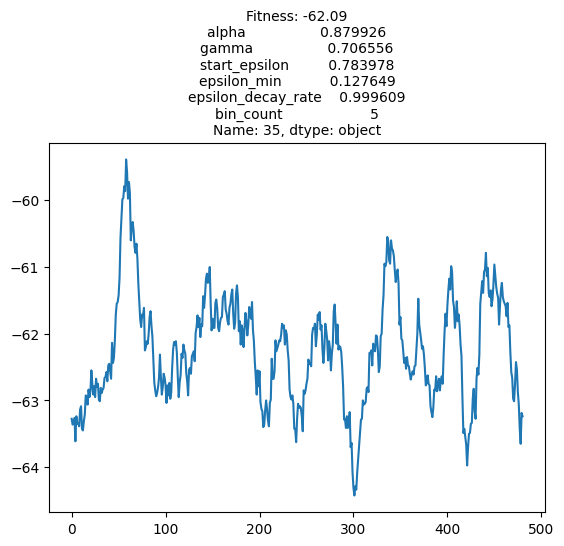

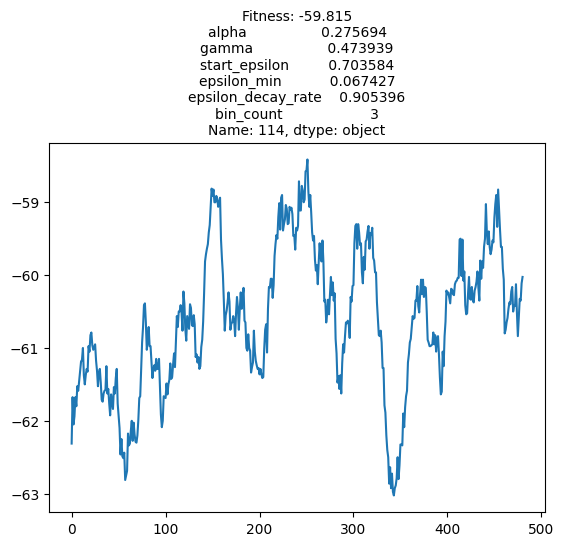

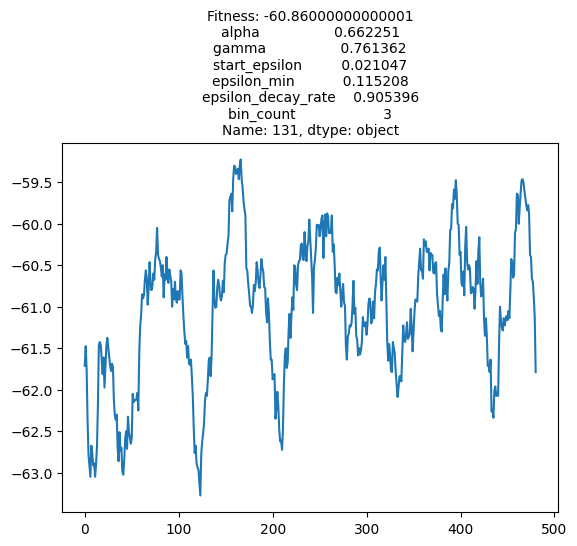

In [13]:
# Show 3 random solutions

random_idx = np.random.choice(range(len(dataframe)), 3)

for idx in random_idx:
    plot_solution(idx)

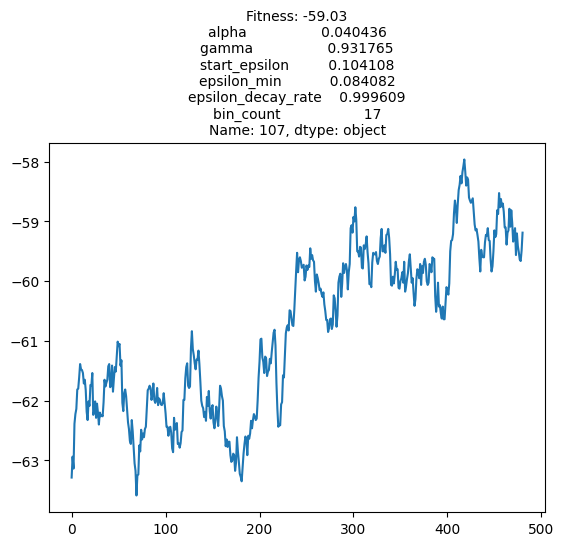

In [18]:
# Best solution

best_idx = dataframe.sort_values(by="fitness", ascending=False).index[0]
best_idx

plot_solution(best_idx)